In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_16481/2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:

X = np.linspace(0.1, 1.0, 10)

for number in X:
    print(number)


0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
1.0


In [3]:
import math

y = list(map(lambda x: (2*math.cos(2*x) + (3/4)*math.sin(4*x)) + 2, X))
noise = np.random.normal(loc=0, scale = 0.03, size=len(y))
y = y + noise

In [4]:

y

array([4.25115403, 4.37212965, 4.32688649, 4.18061733, 3.77639318,
       3.28477481, 2.6011749 , 1.93757053, 1.21365468, 0.63658017])

In [5]:
x0 = []
for i in range(10):
  x0.append(1)

In [6]:
df = pd.DataFrame( { 'x0': x0 ,'x1':X})
df.head()

,x0,x1
0,1,0.1
1,1,0.2
2,1,0.3
3,1,0.4
4,1,0.5


In [7]:
df['x2'] = (df['x1'])**2
df['x3'] = (df['x2'])**2
df['x4'] = (df['x3'])**2
df['x5'] = (df['x4'])**2
df['x6'] = (df['x5'])**2
df['x7'] = (df['x6'])**2
df['x8'] = (df['x7'])**2
df['x9'] = (df['x8'])**2


In [8]:
train_percentage = 0.8

num_train_samples = int(len(df) * train_percentage)

train_set = df.head(num_train_samples)
test_set = df.tail(len(df) - num_train_samples)

print("Training set shape:", train_set.shape)
print("Test set shape:", test_set.shape)

Training set shape: (8, 10)
Test set shape: (2, 10)


In [9]:
num_train_samples = int(len(y) * train_percentage)

y_train = y[:num_train_samples]
y_test = y[num_train_samples:]

In [10]:
y_test

array([1.21365468, 0.63658017])

In [11]:
# max-min normalizato
y_train
ma=max(y_train)
mi=min(y_train)
y_train =[ (x-mi)/(ma-mi) for x in y_train]
# y_test

In [12]:
y_train

[0.9503090253106588,
 1.0,
 0.9814162833945489,
 0.9213359331943365,
 0.7553000625231118,
 0.5533668366739658,
 0.2725768131441784,
 0.0]

In [13]:

train_set

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,1,0.1,0.01,0.0001,1.000000e-08,1.000000e-16,1.000000e-32,1.000000e-64,1.000000e-128,1.000000e-256
1,1,0.2,0.04,0.0016,2.560000e-06,6.553600e-12,4.294967e-23,1.844674e-45,3.402824e-90,1.157921e-179
2,1,0.3,0.09,0.0081,6.561000e-05,4.304672e-09,1.853020e-17,3.433684e-34,1.179018e-67,1.390085e-134
3,1,0.4,0.16,0.0256,6.553600e-04,4.294967e-07,1.844674e-13,3.402824e-26,1.157921e-51,1.340781e-102
4,1,0.5,0.25,0.0625,3.906250e-03,1.525879e-05,2.328306e-10,5.421011e-20,2.938736e-39,8.636169e-78
5,1,0.6,0.36,0.1296,1.679616e-02,2.821110e-04,7.958661e-08,6.334029e-15,4.011992e-29,1.609608e-57
6,1,0.7,0.49,0.2401,5.764801e-02,3.323293e-03,1.104428e-05,1.219760e-10,1.487816e-20,2.213595e-40
7,1,0.8,0.64,0.4096,1.677722e-01,2.814750e-02,7.922816e-04,6.277102e-07,3.940201e-13,1.552518e-25


In [14]:
test_set

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
8,1,0.9,0.81,0.6561,0.430467,0.185302,0.034337,0.001179,0.000001,1.932335e-12
9,1,1.0,1.00,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00


In [16]:
len(train_set), len(y_train)

(8, 8)

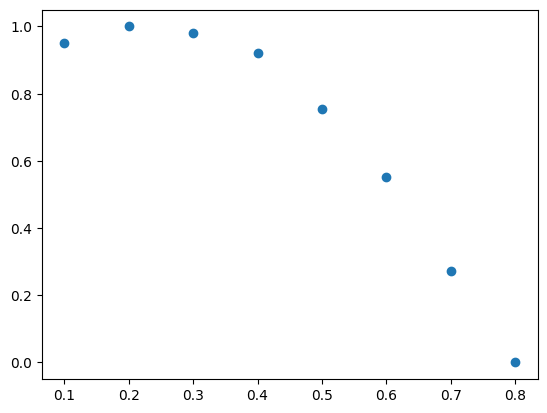

In [22]:
# plot of x1 vs y
plt.scatter(x = train_set.x1, y = y_train)

In [59]:


class poly:
    def __init__(self, w, df, p ): # Constructor: cleed every time we create instance
        self.w =  w[:p]
        self.X = np.array(df.iloc[:, :p]).transpose()
        print(self.X.shape)
        # print("self.X = ", self.X)
        # print("w = ", self.w)
        self.m = len(df)
        self.p = p

        if p == 1:
            self.X = self.X.reshape(1, len(df))
            # print("self.X = ", X.shape)

    def gdloss(self, y, a):
        loss_array = []
        epoch = 1000
        for i in range(epoch):
          # matrx multi
          j = np.matmul( self.w, self.X) -y
          # print("j = ", j)
          # loss cal
          loss = (1/(2*self.m))*np.sum( j**4)
          # print("loss = ", loss)
          loss_array.append(loss)
          # deri cal
          deri = (2/self.m)*(j**3)
          # print("deri = ",deri)
          # print("X = ", self.X)
          # para update
          for k in range(self.p):
            #  print("XX",k," = ", self.X[k])
            #  print( "imp    =   ", np.dot(deri, self.X[k])*a)
             self.w[k] = self.w[k] - (np.dot(deri, self.X[k])*a)
          # print("loss = ", loss)

        return self.w, loss_array




# For learning Rate = 0.05

In [98]:
weights0 = []

Traning of predictor function with degree =  0
(1, 8)
[[0.5833372014307847]]


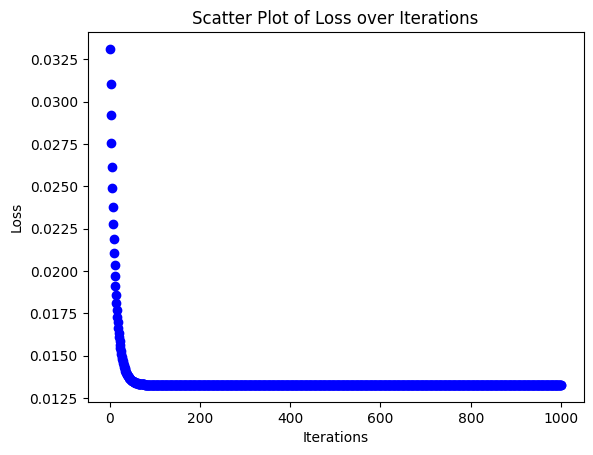

weights of model : {} [0.5833372]
Traning of predictor function with degree =  1
(2, 8)
[[0.5833372014307847], [0.794868062209299, -0.45880713454495137]]


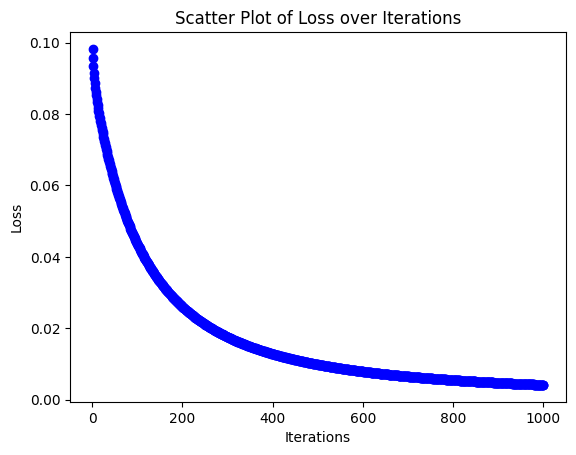

weights of model : {} [ 0.79486806 -0.45880713]
Traning of predictor function with degree =  2
(3, 8)
[[0.5833372014307847], [0.794868062209299, -0.45880713454495137], [0.892332850215828, -0.4294151388105309, -0.3581248206484564]]


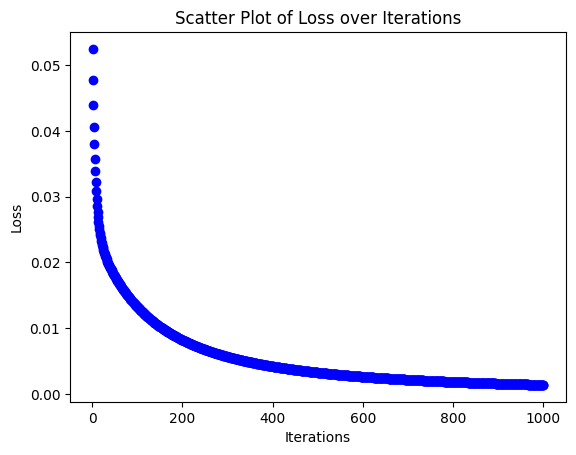

weights of model : {} [ 0.89233285 -0.42941514 -0.35812482]
Traning of predictor function with degree =  3
(4, 8)
[[0.5833372014307847], [0.794868062209299, -0.45880713454495137], [0.892332850215828, -0.4294151388105309, -0.3581248206484564], [0.9397601537376342, -0.4555432675439367, -0.6699216822438184, 0.39940389381240254]]


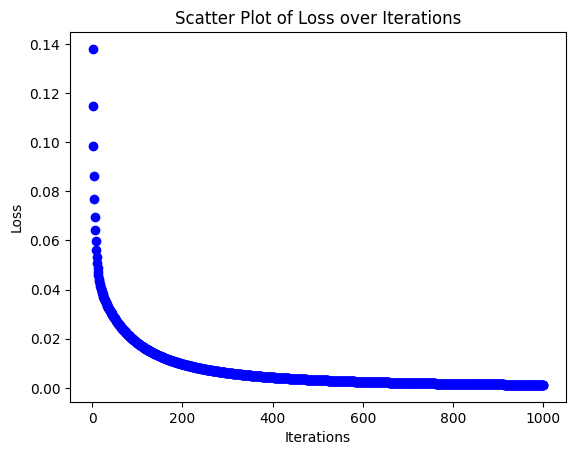

weights of model : {} [ 0.93976015 -0.45554327 -0.66992168  0.39940389]
Traning of predictor function with degree =  4
(5, 8)
[[0.5833372014307847], [0.794868062209299, -0.45880713454495137], [0.892332850215828, -0.4294151388105309, -0.3581248206484564], [0.9397601537376342, -0.4555432675439367, -0.6699216822438184, 0.39940389381240254], [0.8765754623239619, -0.1975462743208687, -0.8214544211865971, 0.270317536476773, -0.007302460403968465]]


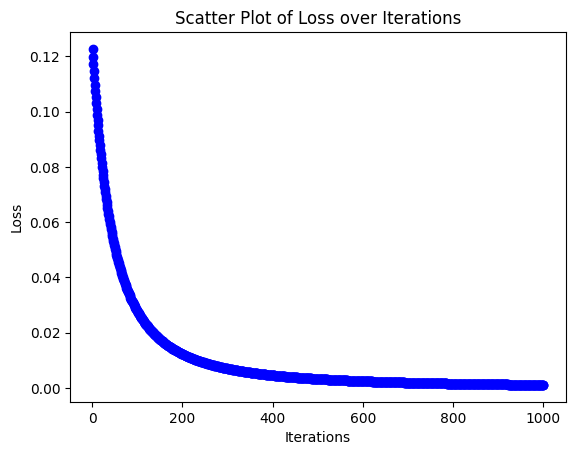

weights of model : {} [ 0.87657546 -0.19754627 -0.82145442  0.27031754 -0.00730246]
Traning of predictor function with degree =  5
(6, 8)
[[0.5833372014307847], [0.794868062209299, -0.45880713454495137], [0.892332850215828, -0.4294151388105309, -0.3581248206484564], [0.9397601537376342, -0.4555432675439367, -0.6699216822438184, 0.39940389381240254], [0.8765754623239619, -0.1975462743208687, -0.8214544211865971, 0.270317536476773, -0.007302460403968465], [0.9330210683333547, -0.517028077370371, -0.39230093251323045, -0.042251691685421304, 0.21549810143308945, 0.8594038979572359]]


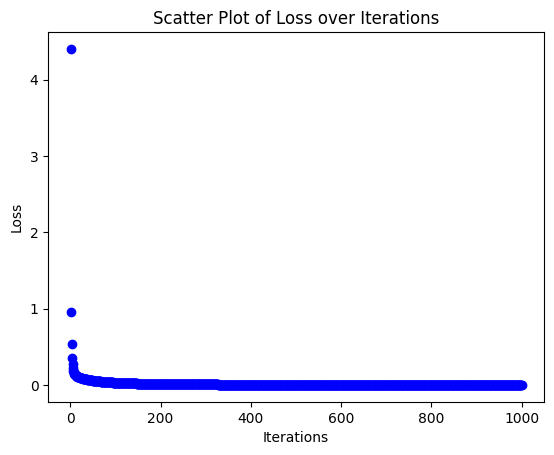

weights of model : {} [ 0.93302107 -0.51702808 -0.39230093 -0.04225169  0.2154981   0.8594039 ]
Traning of predictor function with degree =  6
(7, 8)
[[0.5833372014307847], [0.794868062209299, -0.45880713454495137], [0.892332850215828, -0.4294151388105309, -0.3581248206484564], [0.9397601537376342, -0.4555432675439367, -0.6699216822438184, 0.39940389381240254], [0.8765754623239619, -0.1975462743208687, -0.8214544211865971, 0.270317536476773, -0.007302460403968465], [0.9330210683333547, -0.517028077370371, -0.39230093251323045, -0.042251691685421304, 0.21549810143308945, 0.8594038979572359], [0.9129329254038135, -0.5357062290129272, -0.10320995165087606, -0.32346364432455266, 0.0004125166697184132, 0.49667254359292495, 0.13964380675478433]]


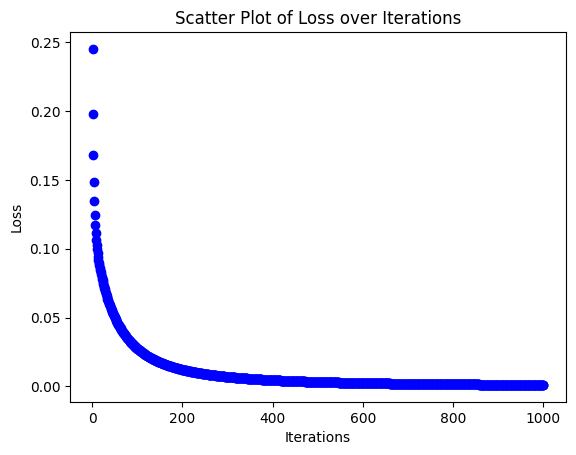

weights of model : {} [ 9.12932925e-01 -5.35706229e-01 -1.03209952e-01 -3.23463644e-01
  4.12516670e-04  4.96672544e-01  1.39643807e-01]
Traning of predictor function with degree =  7
(8, 8)
[[0.5833372014307847], [0.794868062209299, -0.45880713454495137], [0.892332850215828, -0.4294151388105309, -0.3581248206484564], [0.9397601537376342, -0.4555432675439367, -0.6699216822438184, 0.39940389381240254], [0.8765754623239619, -0.1975462743208687, -0.8214544211865971, 0.270317536476773, -0.007302460403968465], [0.9330210683333547, -0.517028077370371, -0.39230093251323045, -0.042251691685421304, 0.21549810143308945, 0.8594038979572359], [0.9129329254038135, -0.5357062290129272, -0.10320995165087606, -0.32346364432455266, 0.0004125166697184132, 0.49667254359292495, 0.13964380675478433], [0.9585031328071999, -0.463046318682282, -0.7480599603195272, 0.2522049449948347, 0.469304192983433, 0.6895231173127734, 0.7701660633000962, 0.07404377758757479]]


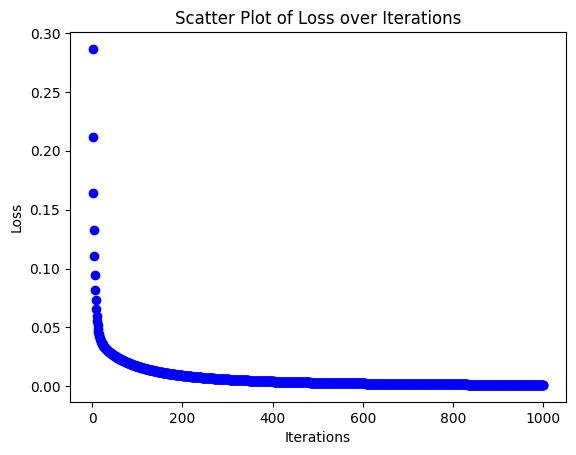

weights of model : {} [ 0.95850313 -0.46304632 -0.74805996  0.25220494  0.46930419  0.68952312
  0.77016606  0.07404378]
Traning of predictor function with degree =  8
(9, 8)
[[0.5833372014307847], [0.794868062209299, -0.45880713454495137], [0.892332850215828, -0.4294151388105309, -0.3581248206484564], [0.9397601537376342, -0.4555432675439367, -0.6699216822438184, 0.39940389381240254], [0.8765754623239619, -0.1975462743208687, -0.8214544211865971, 0.270317536476773, -0.007302460403968465], [0.9330210683333547, -0.517028077370371, -0.39230093251323045, -0.042251691685421304, 0.21549810143308945, 0.8594038979572359], [0.9129329254038135, -0.5357062290129272, -0.10320995165087606, -0.32346364432455266, 0.0004125166697184132, 0.49667254359292495, 0.13964380675478433], [0.9585031328071999, -0.463046318682282, -0.7480599603195272, 0.2522049449948347, 0.469304192983433, 0.6895231173127734, 0.7701660633000962, 0.07404377758757479], [0.8398077767247939, -0.13910335502054885, -0.4416095086881502

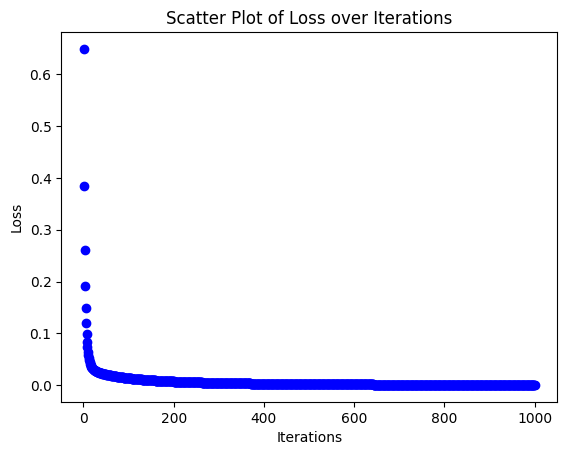

weights of model : {} [ 0.83980778 -0.13910336 -0.44160951 -0.46950319  0.09708291  0.29067387
  0.72865302  0.63755672  0.88721274]
Traning of predictor function with degree =  9
(10, 8)
[[0.5833372014307847], [0.794868062209299, -0.45880713454495137], [0.892332850215828, -0.4294151388105309, -0.3581248206484564], [0.9397601537376342, -0.4555432675439367, -0.6699216822438184, 0.39940389381240254], [0.8765754623239619, -0.1975462743208687, -0.8214544211865971, 0.270317536476773, -0.007302460403968465], [0.9330210683333547, -0.517028077370371, -0.39230093251323045, -0.042251691685421304, 0.21549810143308945, 0.8594038979572359], [0.9129329254038135, -0.5357062290129272, -0.10320995165087606, -0.32346364432455266, 0.0004125166697184132, 0.49667254359292495, 0.13964380675478433], [0.9585031328071999, -0.463046318682282, -0.7480599603195272, 0.2522049449948347, 0.469304192983433, 0.6895231173127734, 0.7701660633000962, 0.07404377758757479], [0.8398077767247939, -0.13910335502054885, -0.441

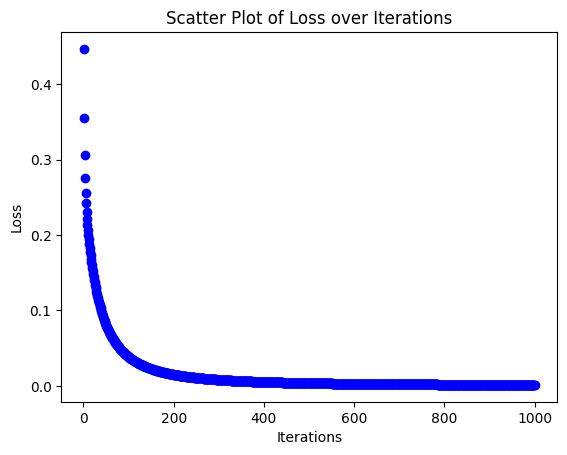

weights of model : {} [ 0.8795956  -0.32173671 -0.42987934 -0.30315711  0.41410109  0.43504846
  0.52109563  0.42753972  0.02541913  0.10789143]


In [99]:
np.random.seed(42)
iteration =  np.linspace( 1, 1000, 1000)

for p in range( 1,11 ):

   print("Traning of predictor function with degree = ", p-1)

   w = np.random.rand(10)
   fx = poly( w, train_set, p)
   weight, loss_array = fx.gdloss(y_train, 0.05)
   weights0.append(weight.tolist())
  #  weights.append((weight.reshape(-1)).tolist())
   print(weights0)
# Create a scatter plot
   plt.scatter( iteration, loss_array, color='blue', marker='o')

   # Set labels for x and y axes
   plt.xlabel('Iterations')
   plt.ylabel('Loss')
   # Set the title of the plot
   plt.title('Scatter Plot of Loss over Iterations')
   # Display the plot
   plt.show()


   print("weights of model : {}", weight)


In [100]:
# weights1 = []

Traning of predictor function with degree =  0
(1, 8)
[[0.583337201018049]]


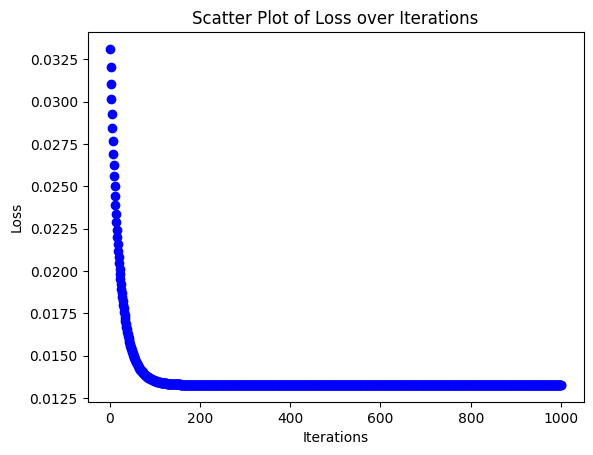

weights of model : {} [0.5833372]
Traning of predictor function with degree =  1
(2, 8)
[[0.583337201018049], [0.6301876382524281, -0.1277624088768326]]


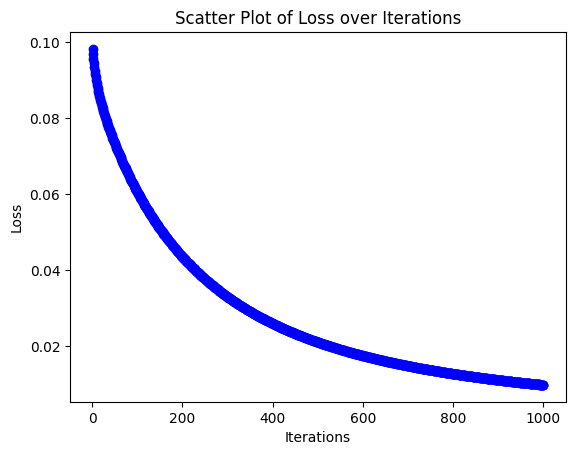

weights of model : {} [ 0.63018764 -0.12776241]
Traning of predictor function with degree =  2
(3, 8)
[[0.583337201018049], [0.6301876382524281, -0.1277624088768326], [0.7858576610731621, -0.3176982683839909, -0.21206008313043062]]


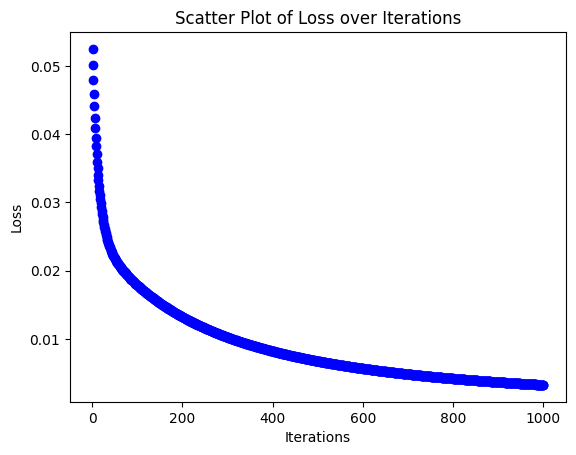

weights of model : {} [ 0.78585766 -0.31769827 -0.21206008]
Traning of predictor function with degree =  3
(4, 8)
[[0.583337201018049], [0.6301876382524281, -0.1277624088768326], [0.7858576610731621, -0.3176982683839909, -0.21206008313043062], [0.8298065413659067, -0.3665070985601972, -0.5425912957540284, 0.503418258373992]]


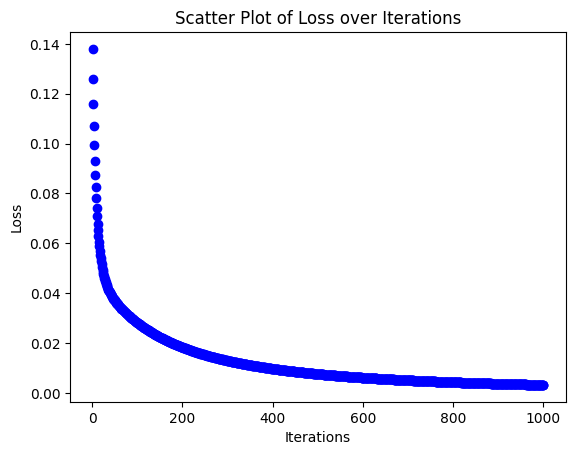

weights of model : {} [ 0.82980654 -0.3665071  -0.5425913   0.50341826]
Traning of predictor function with degree =  4
(5, 8)
[[0.583337201018049], [0.6301876382524281, -0.1277624088768326], [0.7858576610731621, -0.3176982683839909, -0.21206008313043062], [0.8298065413659067, -0.3665070985601972, -0.5425912957540284, 0.503418258373992], [0.7629905682814725, -0.10318819627026568, -0.6920502582512875, 0.37304884751072254, 0.036464434686794306]]


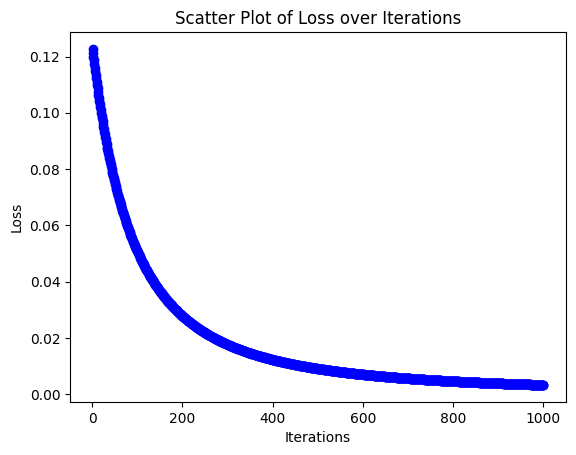

weights of model : {} [ 0.76299057 -0.1031882  -0.69205026  0.37304885  0.03646443]
Traning of predictor function with degree =  5
(6, 8)
[[0.583337201018049], [0.6301876382524281, -0.1277624088768326], [0.7858576610731621, -0.3176982683839909, -0.21206008313043062], [0.8298065413659067, -0.3665070985601972, -0.5425912957540284, 0.503418258373992], [0.7629905682814725, -0.10318819627026568, -0.6920502582512875, 0.37304884751072254, 0.036464434686794306], [0.8137775087340574, -0.42117022244845376, -0.2574888311808355, 0.06618989870482019, 0.2618906541796226, 0.8671048188479745]]


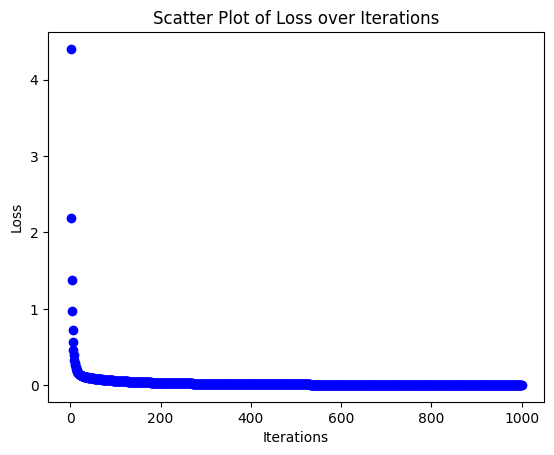

weights of model : {} [ 0.81377751 -0.42117022 -0.25748883  0.0661899   0.26189065  0.86710482]
Traning of predictor function with degree =  6
(7, 8)
[[0.583337201018049], [0.6301876382524281, -0.1277624088768326], [0.7858576610731621, -0.3176982683839909, -0.21206008313043062], [0.8298065413659067, -0.3665070985601972, -0.5425912957540284, 0.503418258373992], [0.7629905682814725, -0.10318819627026568, -0.6920502582512875, 0.37304884751072254, 0.036464434686794306], [0.8137775087340574, -0.42117022244845376, -0.2574888311808355, 0.06618989870482019, 0.2618906541796226, 0.8671048188479745], [0.7990264472000005, -0.44089539284235385, 0.026461112604655813, -0.22117055452092013, 0.043667597860176835, 0.5038069336268144, 0.1398425887651015]]


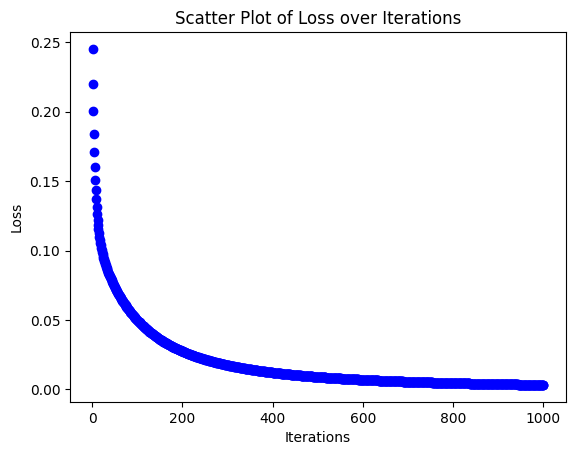

weights of model : {} [ 0.79902645 -0.44089539  0.02646111 -0.22117055  0.0436676   0.50380693
  0.13984259]
Traning of predictor function with degree =  7
(8, 8)
[[0.583337201018049], [0.6301876382524281, -0.1277624088768326], [0.7858576610731621, -0.3176982683839909, -0.21206008313043062], [0.8298065413659067, -0.3665070985601972, -0.5425912957540284, 0.503418258373992], [0.7629905682814725, -0.10318819627026568, -0.6920502582512875, 0.37304884751072254, 0.036464434686794306], [0.8137775087340574, -0.42117022244845376, -0.2574888311808355, 0.06618989870482019, 0.2618906541796226, 0.8671048188479745], [0.7990264472000005, -0.44089539284235385, 0.026461112604655813, -0.22117055452092013, 0.043667597860176835, 0.5038069336268144, 0.1398425887651015], [0.8504285348745683, -0.3812928509242587, -0.6267490485362851, 0.3537426963213247, 0.5139567540065711, 0.697041513214485, 0.7703771845129175, 0.07404394479468009]]


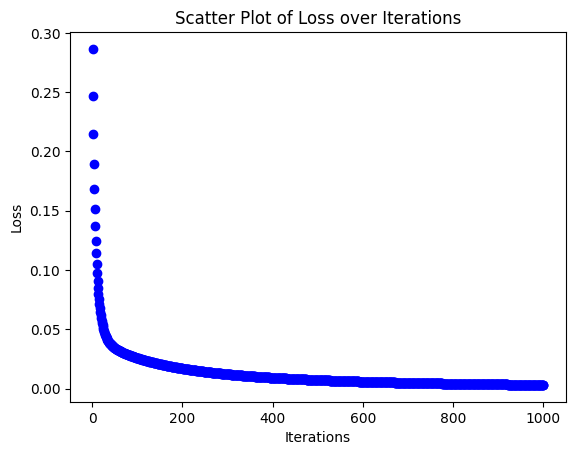

weights of model : {} [ 0.85042853 -0.38129285 -0.62674905  0.3537427   0.51395675  0.69704151
  0.77037718  0.07404394]
Traning of predictor function with degree =  8
(9, 8)
[[0.583337201018049], [0.6301876382524281, -0.1277624088768326], [0.7858576610731621, -0.3176982683839909, -0.21206008313043062], [0.8298065413659067, -0.3665070985601972, -0.5425912957540284, 0.503418258373992], [0.7629905682814725, -0.10318819627026568, -0.6920502582512875, 0.37304884751072254, 0.036464434686794306], [0.8137775087340574, -0.42117022244845376, -0.2574888311808355, 0.06618989870482019, 0.2618906541796226, 0.8671048188479745], [0.7990264472000005, -0.44089539284235385, 0.026461112604655813, -0.22117055452092013, 0.043667597860176835, 0.5038069336268144, 0.1398425887651015], [0.8504285348745683, -0.3812928509242587, -0.6267490485362851, 0.3537426963213247, 0.5139567540065711, 0.697041513214485, 0.7703771845129175, 0.07404394479468009], [0.7441636120962883, -0.054490840361284223, -0.3320585811234007,

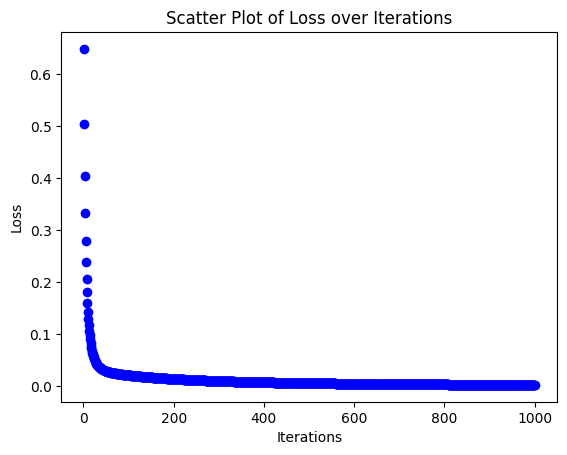

weights of model : {} [ 0.74416361 -0.05449084 -0.33205858 -0.38620372  0.13155341  0.29629209
  0.72880879  0.63755684  0.88721274]
Traning of predictor function with degree =  9
(10, 8)
[[0.583337201018049], [0.6301876382524281, -0.1277624088768326], [0.7858576610731621, -0.3176982683839909, -0.21206008313043062], [0.8298065413659067, -0.3665070985601972, -0.5425912957540284, 0.503418258373992], [0.7629905682814725, -0.10318819627026568, -0.6920502582512875, 0.37304884751072254, 0.036464434686794306], [0.8137775087340574, -0.42117022244845376, -0.2574888311808355, 0.06618989870482019, 0.2618906541796226, 0.8671048188479745], [0.7990264472000005, -0.44089539284235385, 0.026461112604655813, -0.22117055452092013, 0.043667597860176835, 0.5038069336268144, 0.1398425887651015], [0.8504285348745683, -0.3812928509242587, -0.6267490485362851, 0.3537426963213247, 0.5139567540065711, 0.697041513214485, 0.7703771845129175, 0.07404394479468009], [0.7441636120962883, -0.054490840361284223, -0.3320

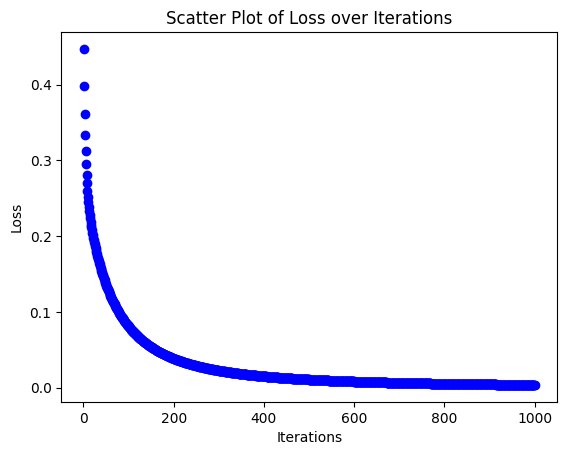

weights of model : {} [ 0.76023741 -0.22139237 -0.29374371 -0.19580048  0.45975205  0.44262492
  0.52130734  0.42753989  0.02541913  0.10789143]


In [101]:
weights1 = []
np.random.seed(42)
iteration =  np.linspace( 1, 1000, 1000)

for p in range( 1,11 ):

   print("Traning of predictor function with degree = ", p-1)

   w = np.random.rand(10)
   fx = poly( w, train_set, p)
   weight, loss_array = fx.gdloss(y_train, 0.025)
   weights1.append(weight.tolist())
  #  weights.append((weight.reshape(-1)).tolist())
   print(weights1)
# Create a scatter plot
   plt.scatter( iteration, loss_array, color='blue', marker='o')

   # Set labels for x and y axes
   plt.xlabel('Iterations')
   plt.ylabel('Loss')
   # Set the title of the plot
   plt.title('Scatter Plot of Loss over Iterations')
   # Display the plot
   plt.show()


   print("weights of model : {}", weight)

Traning of predictor function with degree =  0
(1, 8)


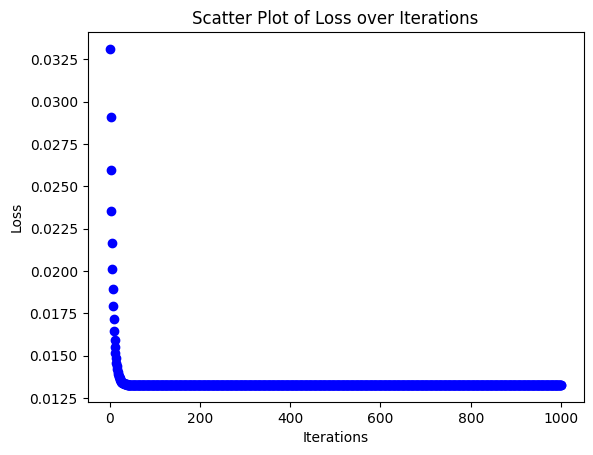

weights of model : {} [0.5833372]
Traning of predictor function with degree =  1
(2, 8)


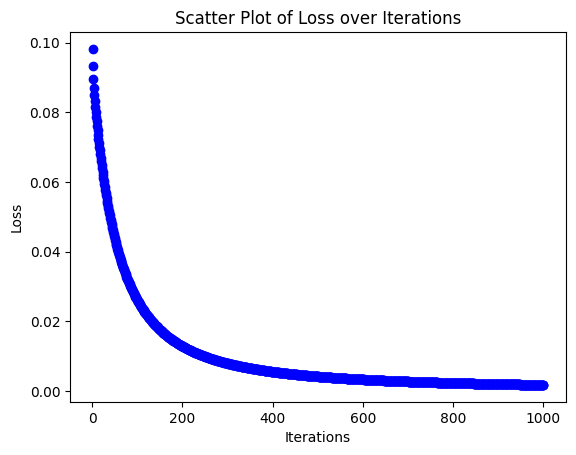

weights of model : {} [ 0.95189507 -0.76061134]
Traning of predictor function with degree =  2
(3, 8)


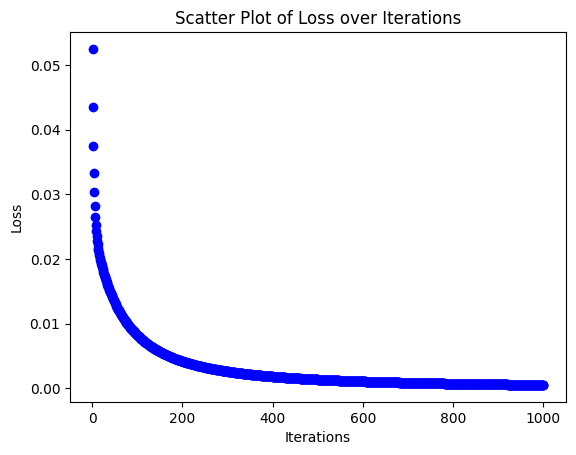

weights of model : {} [ 0.99454989 -0.52938444 -0.49729213]
Traning of predictor function with degree =  3
(4, 8)


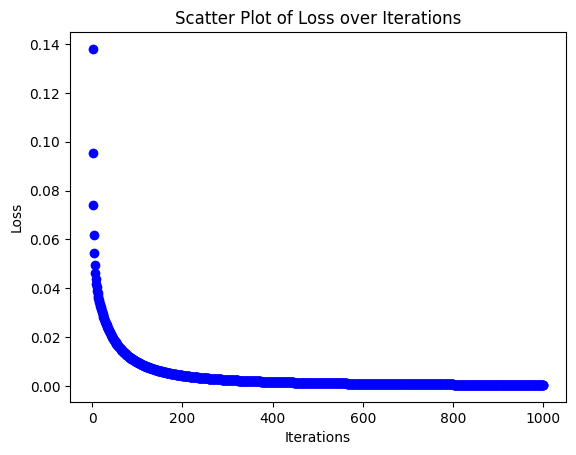

weights of model : {} [ 1.03843871 -0.5287496  -0.78207939  0.30392976]
Traning of predictor function with degree =  4
(5, 8)


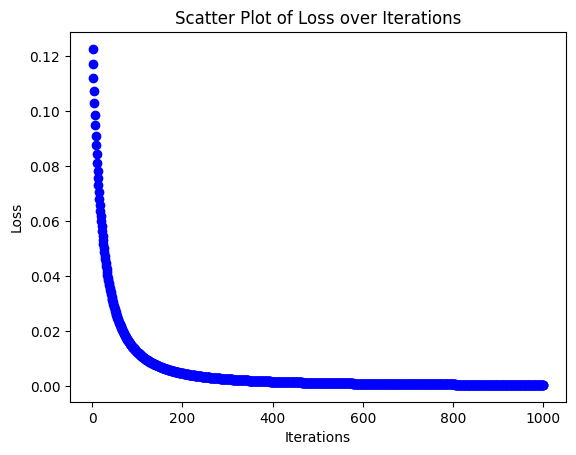

weights of model : {} [ 0.97176089 -0.26987189 -0.92811341  0.18207006 -0.04550138]
Traning of predictor function with degree =  5
(6, 8)


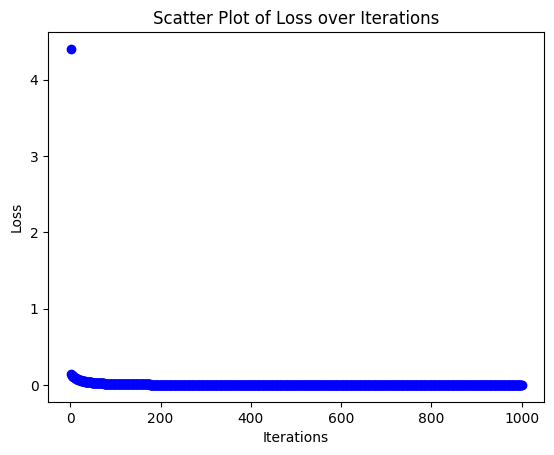

weights of model : {} [ 1.03461555 -0.59340917 -0.5043173  -0.13329892  0.17730781  0.85322908]
Traning of predictor function with degree =  6
(7, 8)


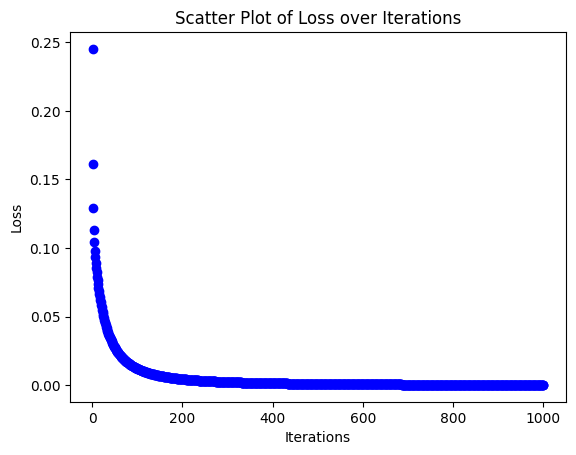

weights of model : {} [ 1.0085269  -0.60910417 -0.21029562 -0.41102363 -0.03705591  0.49049033
  0.13947165]
Traning of predictor function with degree =  7
(8, 8)


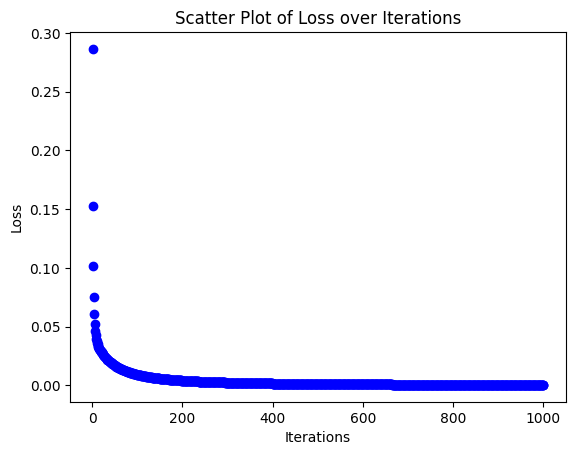

weights of model : {} [ 1.05608152 -0.53035706 -0.85533743  0.15850547  0.42727287  0.68241238
  0.76996625  0.07404362]
Traning of predictor function with degree =  8
(9, 8)


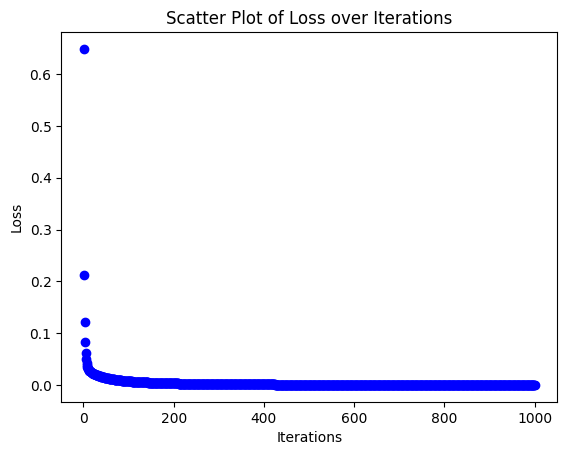

weights of model : {} [ 0.92280188 -0.20806713 -0.53585417 -0.54315481  0.06647519  0.28570711
  0.72851565  0.63755661  0.88721274]
Traning of predictor function with degree =  9
(10, 8)


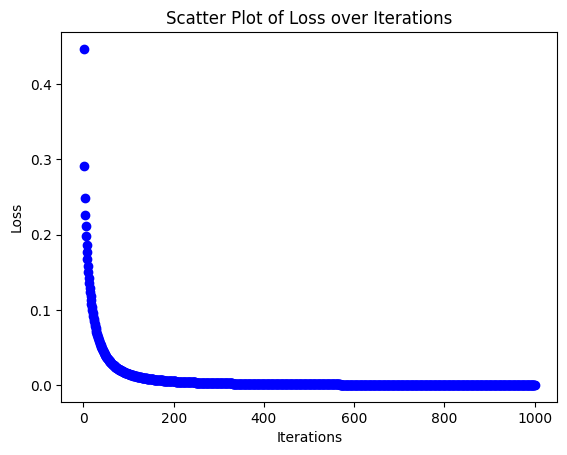

weights of model : {} [ 0.97665571 -0.39644986 -0.53883928 -0.39268422  0.37543675  0.42861442
  0.52091578  0.42753958  0.02541913  0.10789143]


In [102]:
weights2 = []
np.random.seed(42)
iteration =  np.linspace( 1, 1000, 1000)

for p in range( 1,11 ):

   print("Traning of predictor function with degree = ", p-1)

   w = np.random.rand(10)
   fx = poly( w, train_set, p)
   weight, loss_array = fx.gdloss(y_train, 0.1)
   weights2.append(weight.tolist())
  #  weights.append((weight.reshape(-1)).tolist())
   # print(weights2)
# Create a scatter plot
   plt.scatter( iteration, loss_array, color='blue', marker='o')

   # Set labels for x and y axes
   plt.xlabel('Iterations')
   plt.ylabel('Loss')
   # Set the title of the plot
   plt.title('Scatter Plot of Loss over Iterations')
   # Display the plot
   plt.show()


   print("weights of model : {}", weight)

Traning of predictor function with degree =  0
(1, 8)


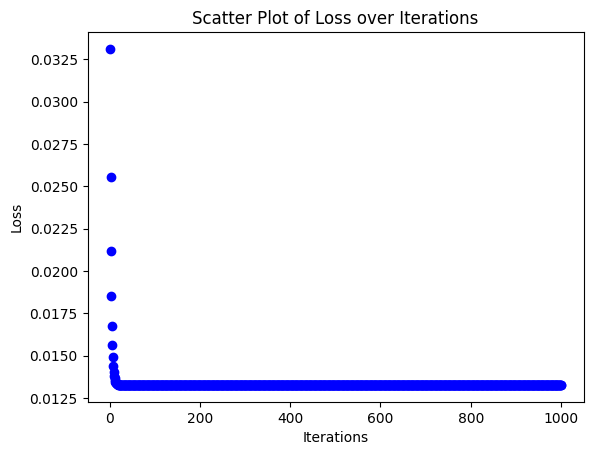

weights of model : {} [0.5833372]
Traning of predictor function with degree =  1
(2, 8)


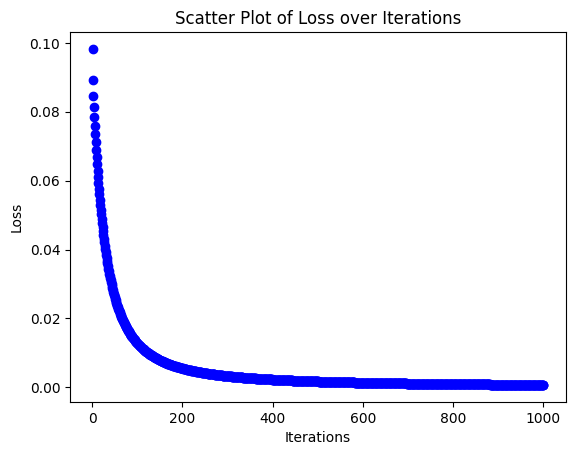

weights of model : {} [ 1.10025689 -1.03140138]
Traning of predictor function with degree =  2
(3, 8)


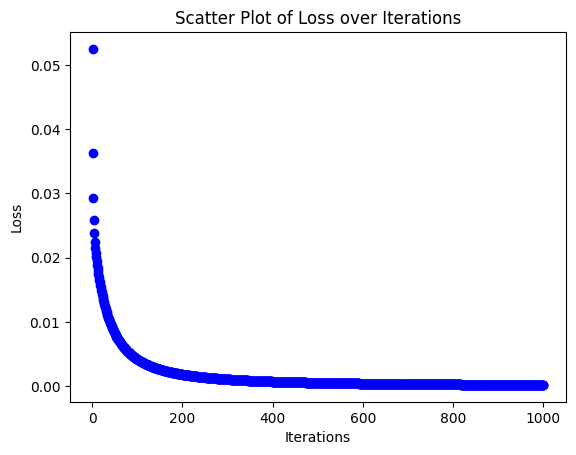

weights of model : {} [ 1.08717528 -0.61424869 -0.62299368]
Traning of predictor function with degree =  3
(4, 8)


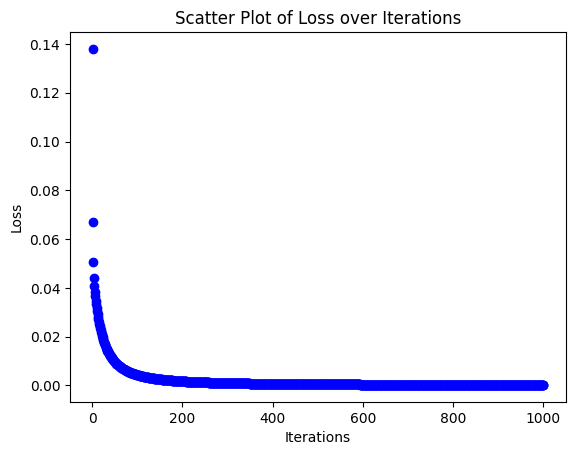

weights of model : {} [ 1.11934624 -0.58462227 -0.87528789  0.22059525]
Traning of predictor function with degree =  4
(5, 8)


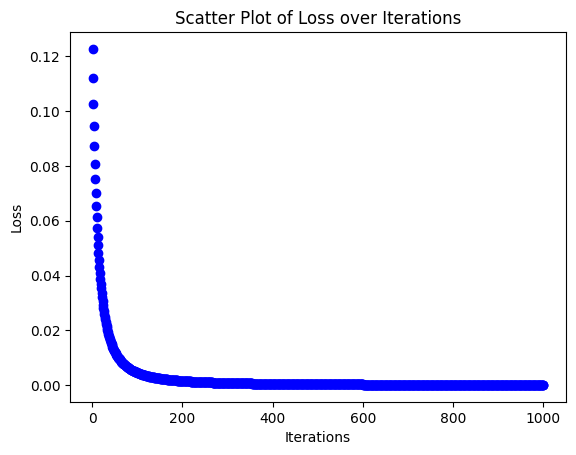

weights of model : {} [ 1.05015828 -0.32478366 -1.01464487  0.10762102 -0.07824326]
Traning of predictor function with degree =  5
(6, 8)


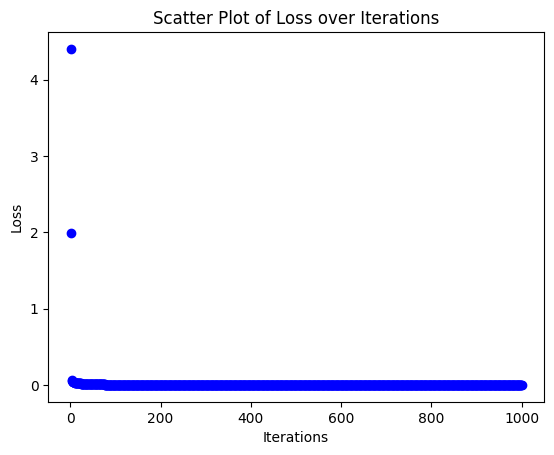

weights of model : {} [ 1.11289915 -0.63855471 -0.59729327 -0.2218566   0.13892034  0.84734674]
Traning of predictor function with degree =  6
(7, 8)


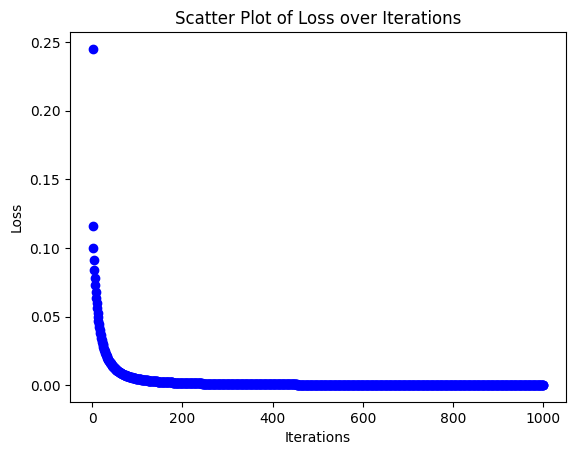

weights of model : {} [ 1.08629617 -0.66494962 -0.29673664 -0.48410688 -0.06863997  0.4852919
  0.13932718]
Traning of predictor function with degree =  7
(8, 8)


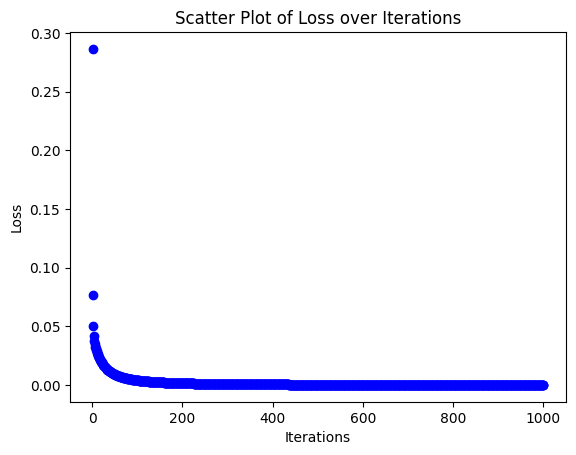

weights of model : {} [ 1.1337922  -0.57974335 -0.94320427  0.07716672  0.38986771  0.67605508
  0.76978763  0.07404348]
Traning of predictor function with degree =  8
(9, 8)


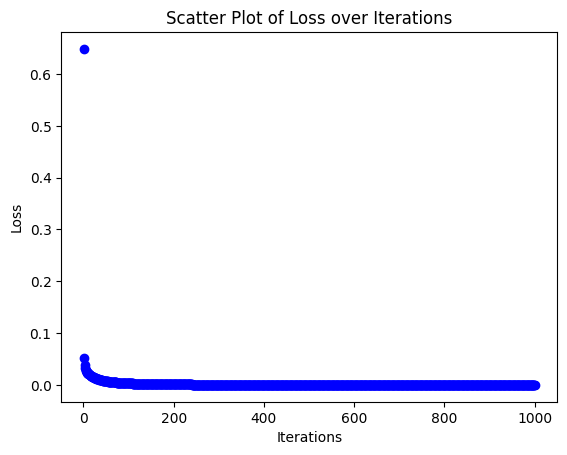

weights of model : {} [ 0.99268265 -0.26265916 -0.61378084 -0.60500116  0.04107     0.2816623
  0.72840474  0.63755652  0.88721274]
Traning of predictor function with degree =  9
(10, 8)


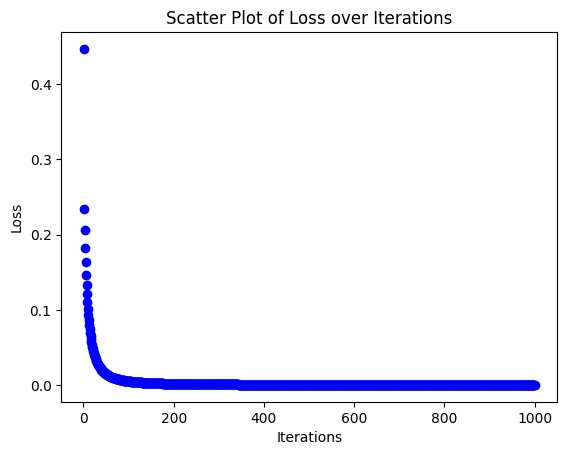

weights of model : {} [ 1.05530008 -0.45225153 -0.62577076 -0.46688113  0.3429524   0.4232086
  0.52076482  0.42753946  0.02541913  0.10789143]


In [103]:
weights3 = []
np.random.seed(42)
iteration =  np.linspace( 1, 1000, 1000)

for p in range( 1,11 ):

   print("Traning of predictor function with degree = ", p-1)

   w = np.random.rand(10)
   fx = poly( w, train_set, p)
   weight, loss_array = fx.gdloss(y_train, 0.2)
   weights3.append(weight.tolist())
  #  weights.append((weight.reshape(-1)).tolist())
   # print(weights1)
# Create a scatter plot
   plt.scatter( iteration, loss_array, color='blue', marker='o')

   # Set labels for x and y axes
   plt.xlabel('Iterations')
   plt.ylabel('Loss')
   # Set the title of the plot
   plt.title('Scatter Plot of Loss over Iterations')
   # Display the plot
   plt.show()


   print("weights of model : {}", weight)

Traning of predictor function with degree =  0
(1, 8)


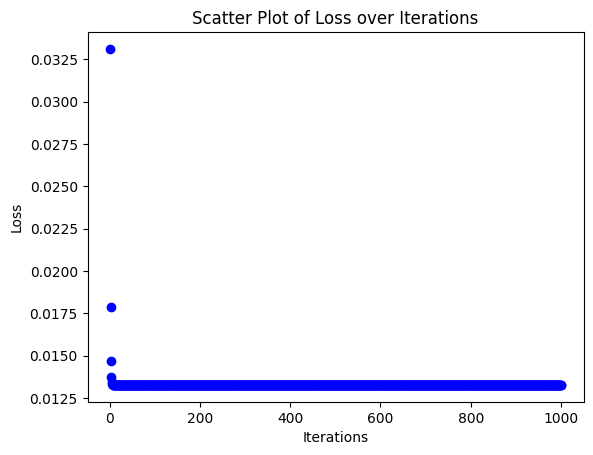

weights of model : {} [0.5833372]
Traning of predictor function with degree =  1
(2, 8)


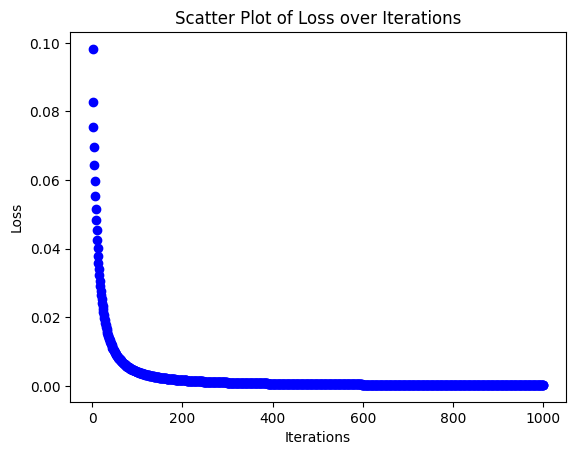

weights of model : {} [ 1.24791349 -1.30457825]
Traning of predictor function with degree =  2
(3, 8)


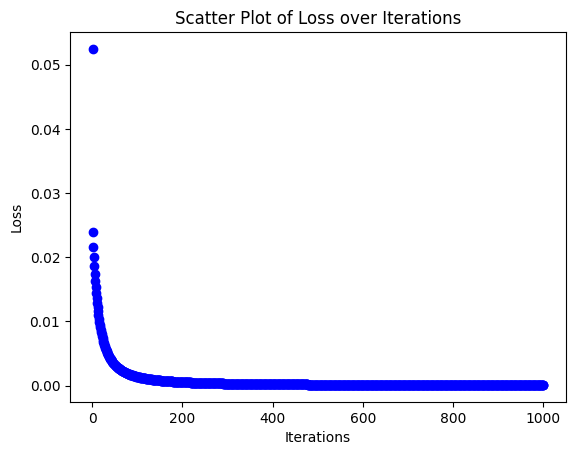

weights of model : {} [ 1.16367962 -0.67805408 -0.74893456]
Traning of predictor function with degree =  3
(4, 8)


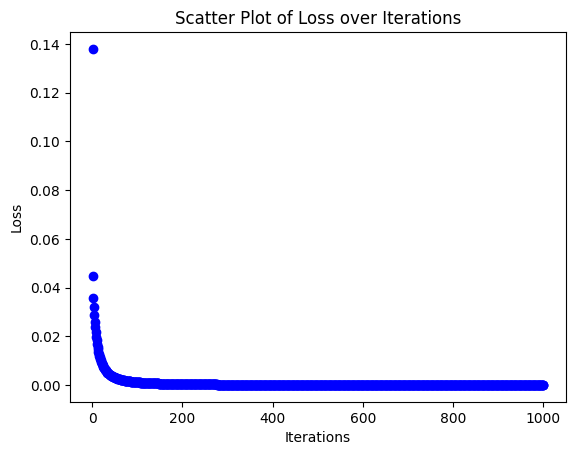

weights of model : {} [ 1.1669977  -0.60203287 -0.9518431   0.13365887]
Traning of predictor function with degree =  4
(5, 8)


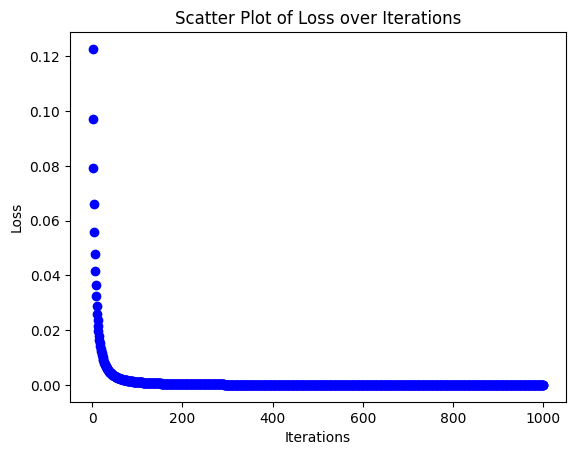

weights of model : {} [ 1.112922   -0.3629003  -1.09360592  0.03162823 -0.11290177]
Traning of predictor function with degree =  5
(6, 8)


/tmp/ipykernel_16481/924648607.py:23: RuntimeWarning: overflow encountered in power
  loss = (1/(2*self.m))*np.sum( j**4)
/tmp/ipykernel_16481/924648607.py:27: RuntimeWarning: overflow encountered in power
  deri = (2/self.m)*(j**3)
/tmp/ipykernel_16481/924648607.py:34: RuntimeWarning: invalid value encountered in scalar subtract
  self.w[k] = self.w[k] - (np.dot(deri, self.X[k])*a)


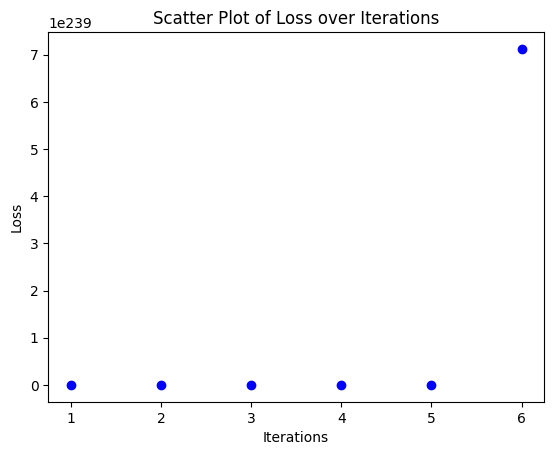

weights of model : {} [nan nan nan nan nan nan]
Traning of predictor function with degree =  6
(7, 8)


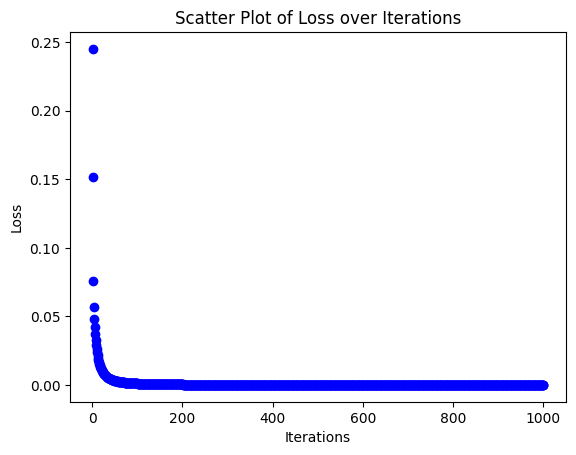

weights of model : {} [ 1.14457748 -0.70027833 -0.37382006 -0.55791561 -0.10119837  0.48003467
  0.13918285]
Traning of predictor function with degree =  7
(8, 8)


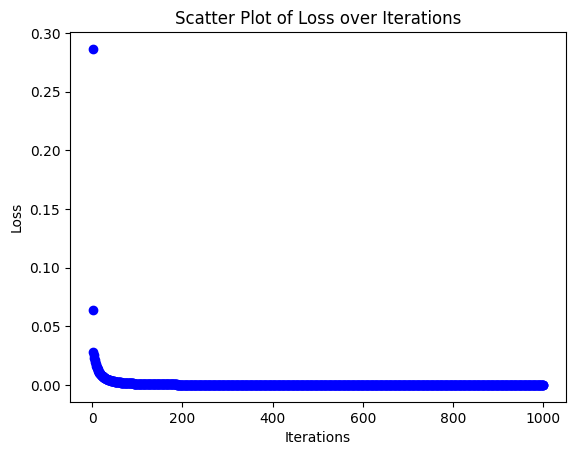

weights of model : {} [ 1.17217054 -0.58205525 -1.01018449 -0.0078038   0.34771086  0.66889741
  0.76958817  0.07404332]
Traning of predictor function with degree =  8
(9, 8)


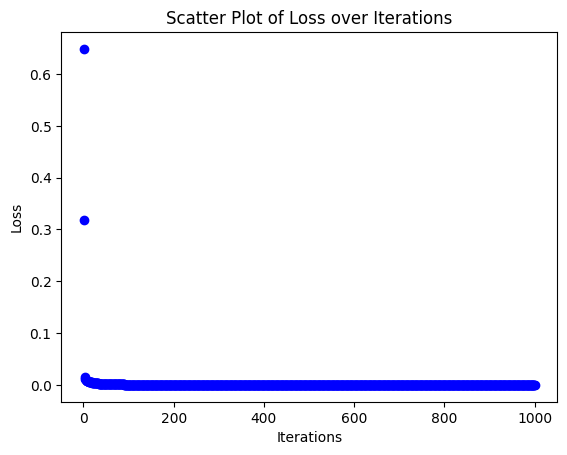

weights of model : {} [ 1.06064425 -0.30843522 -0.69471318 -0.67547273  0.0127417   0.27755667
  0.72829862  0.63755644  0.88721274]
Traning of predictor function with degree =  9
(10, 8)


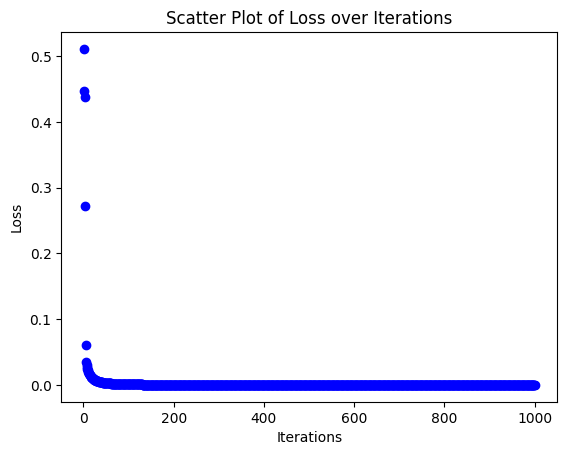

weights of model : {} [ 1.11717269 -0.484855   -0.70796217 -0.54814792  0.30828996  0.41803347
  0.52062939  0.42753935  0.02541913  0.10789143]


In [104]:
weights4 = []
np.random.seed(42)
iteration =  np.linspace( 1, 1000, 1000)

for p in range( 1,11 ):

   print("Traning of predictor function with degree = ", p-1)

   w = np.random.rand(10)
   fx = poly( w, train_set, p)
   weight, loss_array = fx.gdloss(y_train, 0.5)
   weights4.append(weight.tolist())
  #  weights.append((weight.reshape(-1)).tolist())
   # print(weights1)
# Create a scatter plot
   plt.scatter( iteration, loss_array, color='blue', marker='o')

   # Set labels for x and y axes
   plt.xlabel('Iterations')
   plt.ylabel('Loss')
   # Set the title of the plot
   plt.title('Scatter Plot of Loss over Iterations')
   # Display the plot
   plt.show()


   print("weights of model : {}", weight)

#Q2

In [105]:
weights0

[[0.5833372014307847],
 [0.794868062209299, -0.45880713454495137],
 [0.892332850215828, -0.4294151388105309, -0.3581248206484564],
 [0.9397601537376342,
  -0.4555432675439367,
  -0.6699216822438184,
  0.39940389381240254],
 [0.8765754623239619,
  -0.1975462743208687,
  -0.8214544211865971,
  0.270317536476773,
  -0.007302460403968465],
 [0.9330210683333547,
  -0.517028077370371,
  -0.39230093251323045,
  -0.042251691685421304,
  0.21549810143308945,
  0.8594038979572359],
 [0.9129329254038135,
  -0.5357062290129272,
  -0.10320995165087606,
  -0.32346364432455266,
  0.0004125166697184132,
  0.49667254359292495,
  0.13964380675478433],
 [0.9585031328071999,
  -0.463046318682282,
  -0.7480599603195272,
  0.2522049449948347,
  0.469304192983433,
  0.6895231173127734,
  0.7701660633000962,
  0.07404377758757479],
 [0.8398077767247939,
  -0.13910335502054885,
  -0.4416095086881502,
  -0.46950318525199053,
  0.0970829098697751,
  0.2906738691667894,
  0.7286530220367075,
  0.6375567180787325,

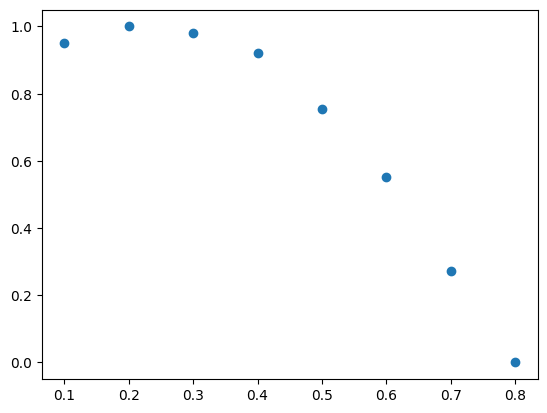

In [106]:
# Q2 part 1
plt.scatter(x = train_set.x1, y = y_train)

In [107]:

# trained model
class poly_test:
    def __init__(self, w, df, p ): # Constructor: cleed every time we create instance
        self.w = w
        self.X = np.array(df.iloc[:, :p]).transpose()
        print(self.X.shape)
  
        self.m = len(df)
        self.p = p

    def gdloss(self, y, a):
        loss_array = []
        epoch = 1
        for i in range(epoch):
          # matrx multi
          j = np.matmul( self.w, self.X) -y
          # loss cal
          loss = (1/(2*self.m))*np.sum( j**4)
          print("loss = ", loss)

          loss_array.append(loss)
          

        return self.w, loss_array




[0 1 2 3 4 5 6 7 8 9]
Test of predictor function with degree =  0
(1, 8)
loss =  0.013276998930987993
Test of predictor function with degree =  1
(2, 8)
loss =  0.004133088392839003
Test of predictor function with degree =  2
(3, 8)
loss =  0.001373971673394973
Test of predictor function with degree =  3
(4, 8)
loss =  0.0012102278573516726
Test of predictor function with degree =  4
(5, 8)
loss =  0.001115315853642026
Test of predictor function with degree =  5
(6, 8)
loss =  0.0012271746318695156
Test of predictor function with degree =  6
(7, 8)
loss =  0.0011145909332740797
Test of predictor function with degree =  7
(8, 8)
loss =  0.001193998613093542
Test of predictor function with degree =  8
(9, 8)
loss =  0.0008632914884206952
Test of predictor function with degree =  9
(10, 8)
loss =  0.0011489237639706563


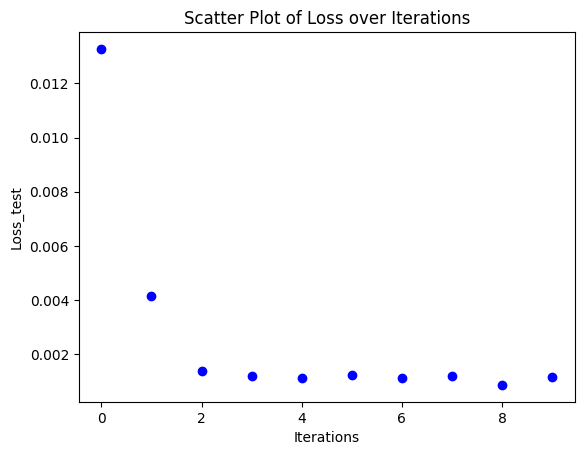

weights of model : {} [0.8795955977839622, -0.321736706558879, -0.4298793351449237, -0.30315711459385747, 0.4141010876877059, 0.43504846460365654, 0.5210956330373938, 0.42753972295783915, 0.02541912674328206, 0.10789142699330445]


In [108]:
np.random.seed(42)
iteration =  np.array([0,1,2,3,4,5,6,7,8,9])
print(iteration)
loss_test0 =[]
for p in range( 1,11 ):

   print("Test of predictor function with degree = ", p-1)

   w = weights0[p-1]
   fx = poly_test( w, train_set, p)
   weight, loss = fx.gdloss(y_train, 0.05)
   loss_test0.append(loss)
  #  weights.append((weight.reshape(-1)).tolist())
   # print(weights)
# Create a scatter plot
plt.scatter( iteration, loss_test0, color='blue', marker='o')

   # Set labels for x and y axes
plt.xlabel('Iterations')
plt.ylabel('Loss_test')
   # Set the title of the plot
plt.title('Scatter Plot of Loss over Iterations')
   # Display the plot
plt.show()

print("weights of model : {}", weight)


## Q2 part 3

[0 1 2 3 4 5 6 7 8 9]
Test of predictor function with degree =  0
(1, 8)
loss =  0.013276998930987993
Test of predictor function with degree =  1
(2, 8)
loss =  0.009851336506113181
Test of predictor function with degree =  2
(3, 8)
loss =  0.0032563296353739606
Test of predictor function with degree =  3
(4, 8)
loss =  0.003188851741790674
Test of predictor function with degree =  4
(5, 8)
loss =  0.003283844079496353
Test of predictor function with degree =  5
(6, 8)
loss =  0.0035863123737131927
Test of predictor function with degree =  6
(7, 8)
loss =  0.0032881165693182074
Test of predictor function with degree =  7
(8, 8)
loss =  0.003101746284368688
Test of predictor function with degree =  8
(9, 8)
loss =  0.002399974763792269
Test of predictor function with degree =  9
(10, 8)
loss =  0.0035633637768720363


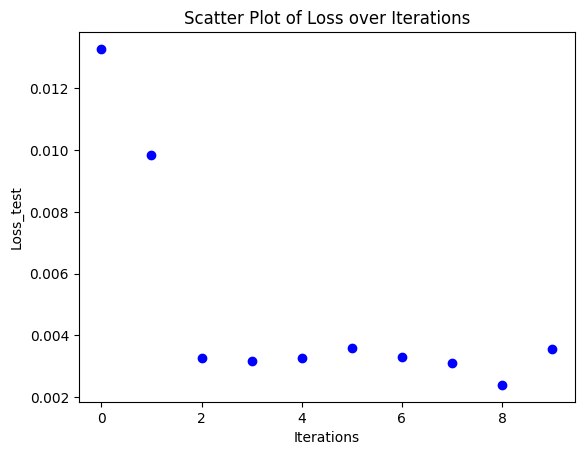

weights of model : {} [0.7602374070047774, -0.22139237418696286, -0.29374370773268915, -0.19580048357763521, 0.4597520472375325, 0.44262492317740865, 0.5213073434409067, 0.4275398905279654, 0.02541912674338726, 0.10789142699330445]


In [109]:
# 0.025

np.random.seed(42)
iteration =  np.array([0,1,2,3,4,5,6,7,8,9])
print(iteration)
loss_test1 =[]
for p in range( 1,11 ):

   print("Test of predictor function with degree = ", p-1)

   w = weights1[p-1]
   fx = poly_test( w, train_set, p)
   weight, loss = fx.gdloss(y_train, 0.025)
   loss_test1.append(loss)
  #  weights.append((weight.reshape(-1)).tolist())
   # print(weights)
# Create a scatter plot
plt.scatter( iteration, loss_test1, color='blue', marker='o')

   # Set labels for x and y axes
plt.xlabel('Iterations')
plt.ylabel('Loss_test')
   # Set the title of the plot
plt.title('Scatter Plot of Loss over Iterations')
   # Display the plot
plt.show()

print("weights of model : {}", weight)


In [110]:
# lr = 0.05
# already test_loss0

[0 1 2 3 4 5 6 7 8 9]
Test of predictor function with degree =  0
(1, 8)
loss =  0.013276998930987993
Test of predictor function with degree =  1
(2, 8)
loss =  0.0016988651416014664
Test of predictor function with degree =  2
(3, 8)
loss =  0.0005377877145174975
Test of predictor function with degree =  3
(4, 8)
loss =  0.0004323485033320982
Test of predictor function with degree =  4
(5, 8)
loss =  0.00037178840256008955
Test of predictor function with degree =  5
(6, 8)
loss =  0.00040996179886397305
Test of predictor function with degree =  6
(7, 8)
loss =  0.0003670757227110244
Test of predictor function with degree =  7
(8, 8)
loss =  0.00043004072073421143
Test of predictor function with degree =  8
(9, 8)
loss =  0.000291766820174156
Test of predictor function with degree =  9
(10, 8)
loss =  0.0003708781778387181


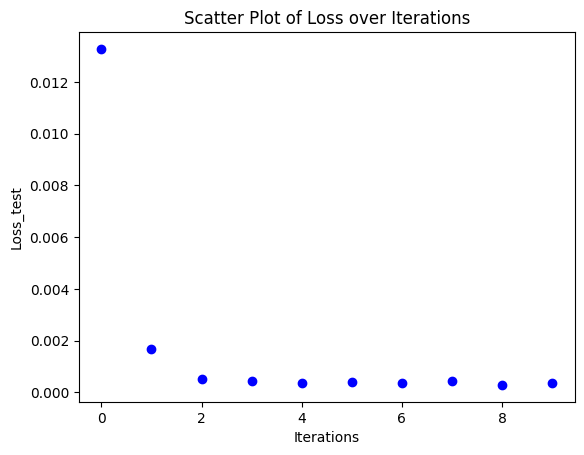

weights of model : {} [0.9766557129395864, -0.3964498582304439, -0.5388392832830305, -0.3926842161537586, 0.37543675354384703, 0.42861442410347383, 0.5209157768189666, 0.42753958059458586, 0.025419126743192706, 0.10789142699330445]


In [111]:
# lr = 0.1


np.random.seed(42)
iteration =  np.array([0,1,2,3,4,5,6,7,8,9])
print(iteration)
loss_test2 =[]
for p in range( 1,11 ):

   print("Test of predictor function with degree = ", p-1)

   w = weights2[p-1]
   fx = poly_test( w, train_set, p)
   weight, loss = fx.gdloss(y_train, 0.1)
   loss_test2.append(loss)
  #  weights.append((weight.reshape(-1)).tolist())
   # print(weights)
# Create a scatter plot
plt.scatter( iteration, loss_test2, color='blue', marker='o')

   # Set labels for x and y axes
plt.xlabel('Iterations')
plt.ylabel('Loss_test')
   # Set the title of the plot
plt.title('Scatter Plot of Loss over Iterations')
   # Display the plot
plt.show()

print("weights of model : {}", weight)


[0 1 2 3 4 5 6 7 8 9]
Test of predictor function with degree =  0
(1, 8)
loss =  0.013276998930987993
Test of predictor function with degree =  1
(2, 8)
loss =  0.0006976331886012121
Test of predictor function with degree =  2
(3, 8)
loss =  0.0002036136626477366
Test of predictor function with degree =  3
(4, 8)
loss =  0.0001605600220272173
Test of predictor function with degree =  4
(5, 8)
loss =  0.00012332224590504888
Test of predictor function with degree =  5
(6, 8)
loss =  0.0001390959581030767
Test of predictor function with degree =  6
(7, 8)
loss =  0.00012075615353910171
Test of predictor function with degree =  7
(8, 8)
loss =  0.0001680512308574967
Test of predictor function with degree =  8
(9, 8)
loss =  9.576026689989427e-05
Test of predictor function with degree =  9
(10, 8)
loss =  0.00012016716887193316


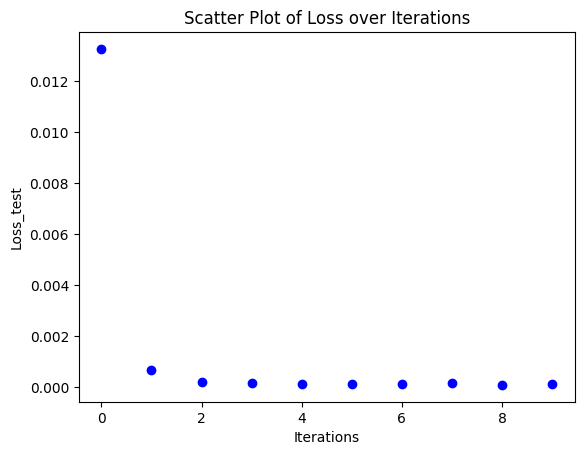

weights of model : {} [1.0553000792526284, -0.45225152841470345, -0.6257707602475286, -0.46688113318825947, 0.34295239952925605, 0.42320860115531694, 0.5207648168745554, 0.4275394611214121, 0.025419126743117706, 0.10789142699330445]


In [112]:
# 0.2

np.random.seed(42)
iteration =  np.array([0,1,2,3,4,5,6,7,8,9])
print(iteration)
loss_test3 =[]
for p in range( 1,11 ):

   print("Test of predictor function with degree = ", p-1)

   w = weights3[p-1]
   fx = poly_test( w, train_set, p)
   weight, loss = fx.gdloss(y_train, 0.2)
   loss_test3.append(loss)
  #  weights.append((weight.reshape(-1)).tolist())
   # print(weights)
# Create a scatter plot
plt.scatter( iteration, loss_test3, color='blue', marker='o')

   # Set labels for x and y axes
plt.xlabel('Iterations')
plt.ylabel('Loss_test')
   # Set the title of the plot
plt.title('Scatter Plot of Loss over Iterations')
   # Display the plot
plt.show()

print("weights of model : {}", weight)


[0 1 2 3 4 5 6 7 8 9]
Test of predictor function with degree =  0
(1, 8)
loss =  0.013276998930987993
Test of predictor function with degree =  1
(2, 8)
loss =  0.00030894291788061996
Test of predictor function with degree =  2
(3, 8)
loss =  9.611734155579333e-05
Test of predictor function with degree =  3
(4, 8)
loss =  9.135391642050084e-05
Test of predictor function with degree =  4
(5, 8)
loss =  4.7453613541009564e-05
Test of predictor function with degree =  5
(6, 8)
loss =  nan
Test of predictor function with degree =  6
(7, 8)
loss =  5.0108946941150833e-05
Test of predictor function with degree =  7
(8, 8)
loss =  0.00010338835210710573
Test of predictor function with degree =  8
(9, 8)
loss =  2.4297348573728558e-05
Test of predictor function with degree =  9
(10, 8)
loss =  4.318861718349117e-05


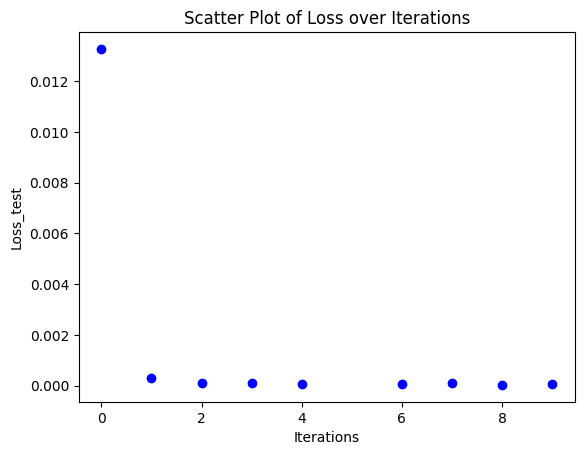

weights of model : {} [1.1171726933774682, -0.4848549973607457, -0.7079621686966867, -0.5481479180980706, 0.3082899581943531, 0.41803346575228945, 0.5206293918847574, 0.4275393549160011, 0.02541912674305108, 0.10789142699330445]


In [113]:
# 0.5

np.random.seed(42)
iteration =  np.array([0,1,2,3,4,5,6,7,8,9])
print(iteration)
loss_test4 =[]
for p in range( 1,11 ):

   print("Test of predictor function with degree = ", p-1)

   w = weights4[p-1]
   fx = poly_test( w, train_set, p)
   weight, loss = fx.gdloss(y_train, 0.5)
   loss_test4.append(loss)
  #  weights.append((weight.reshape(-1)).tolist())
   # print(weights)
# Create a scatter plot
plt.scatter( iteration, loss_test4, color='blue', marker='o')

   # Set labels for x and y axes
plt.xlabel('Iterations')
plt.ylabel('Loss_test')
   # Set the title of the plot
plt.title('Scatter Plot of Loss over Iterations')
   # Display the plot
plt.show()

print("weights of model : {}", weight)


[[0.003283844079496353], [0.001115315853642026], [0.00037178840256008955], [0.00012332224590504888], [4.7453613541009564e-05]]


Text(0.5, 1.0, 'Scatter Plot of Test Loss for Polynomial 4')

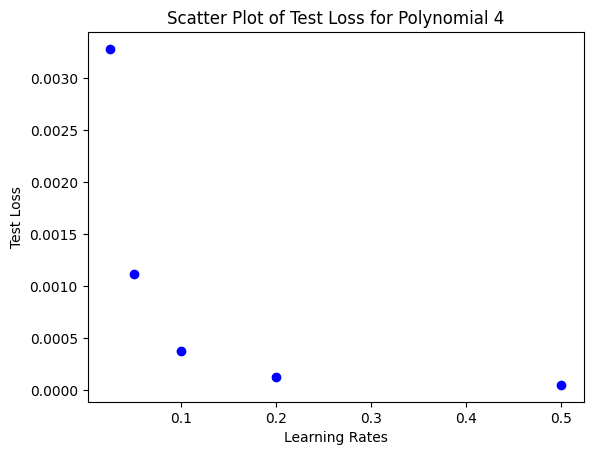

In [114]:
# now plot of lr vs test error

lrs = np.array( [0.025, 0.05, 0.1, 0.2, 0.5])
# test loss array for polynomila 4


error_t =[]
error_t.append(loss_test1[4])
error_t.append(loss_test0[4])
error_t.append(loss_test2[4])
error_t.append(loss_test3[4])
error_t.append(loss_test4[4])


print(error_t)
error_tt = np.array(error_t)

plt.scatter(lrs, error_tt, color='blue', marker='o')

# Set labels for x and y axes
plt.xlabel('Learning Rates')
plt.ylabel('Test Loss')

# Set the title of the plot
plt.title('Scatter Plot of Test Loss for Polynomial 4')


# Best leraning rate is 0.5